# DATA Processing

The purpose of this Notebook is to perform the data processing steps for each sample:

- DP1 : Substraction
- DP2 : Gaussian fitting

One aim is to make this Notebook working within an html page and interactive using ipython widget

## Workflow

In [413]:
#

To create (drag and drop image when produced)

### Libraries

In [564]:
import numpy 
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from glob import glob
from functools import reduce
import ipywidgets as widgets
import matplotlib.gridspec as gridspec
from ipywidgets import interact
import re
from cycler import cycler
import seaborn as sns
import matplotlib.gridspec as gridspec

from lmfit.models import ExponentialModel, GaussianModel


# Experiment parameters

Not use (but here just in case)

Take time to describe method used with respect to previous Notebook (Improvement - Emphase on python teaching)

### Date

In [500]:
date = "2020_09_16"


### XP

In [501]:
# Can take value XP_1-1, XP_1-2 

XP = "XP_1-1"

### Sample type

In [502]:
# Can take value ASW, C2H6, C2H6_ASW

spl = "ASW"

# <span style='background :yellow' > $\color{green}{\text{DP1 : Sample Checking}}$ </span>

# 1.1 DATA Import

The Data processing routine is performed per sample. 

A date is set as input

from the previous data analysis, summarized in the following document below, we have identified 4 temeperature ranges where the sample undergo different physical processes.

[XP1_Plan](D:\PhD-WS\Projects\PAC\Document\Reports\XP1_Plan.docx)

So the purpose here is to chop the data with respect to those ranges before to perform the Substraction

Experimental ranges (in T):

- Range 1: 20 - 100K
- Range 2: 100 to 130K
- Range 3: 130K - 140K
- Range 4: Beyond 140K


I want to extract the temperature ramp info from XP Ramp:


## 1.1.1 XP-Ramp

In [544]:
XP_Ramp_df = pd.read_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\XP_list_test.csv')
XP_Ramp_df_I = XP_Ramp_df.set_index('Date')

In [545]:
XP_Ramp_df_I.head(5)

,Sample,20K,30K,40K,50K,60K,70K,80K,90K,100K,...,136K,137K,138K,140K,145K,150K,155K,160K,180K,200K
Date,,,,,,,,,,,,,,,,,,,,,
2020_09_15,ASW,[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,[3],NaN,[4],NaN,NaN,NaN,NaN
2020_09_16,ASW,"[1, 2]",NaN,"[3, 4, 5]",NaN,"[6, 7, 8]",NaN,"[9, 10, 11]",NaN,"[12, 13, 14]",...,NaN,NaN,NaN,"[21, 22, 23]",NaN,"[24, 25, 26]",NaN,NaN,"[27, 28, 29]","[30, 31]"
2020_09_17,ASW,"[1, 2]",NaN,"[3, 4, 5]",NaN,"[6, 7, 8]",NaN,"[9, 10, 11]",NaN,"[12, 13, 14]",...,NaN,NaN,NaN,"[21, 22, 23]",NaN,"[24, 25, 26]",NaN,NaN,"[27, 28]",NaN
2020_09_21,ASW,"[1, 2]",NaN,"[3, 4, 5]",NaN,"[6, 7, 8]",NaN,"[9, 10, 11]",NaN,"[12, 13, 14]",...,NaN,NaN,NaN,"[21, 22, 23]",NaN,"[24, 25, 26]",NaN,NaN,"[27, 28]",NaN


## 1.1.2 DR1, DR2, DR3

###  DR1

In [505]:
DR1_Allscan_df = pd.read_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\DR1_{0}_All-scans.csv'.format(date))
DR1_Allscan_df = DR1_Allscan_df.T.iloc[1:].T

In [506]:
DR1_Allscan_df

,Wavenumber,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,ASW_2020_09_16_6,ASW_2020_09_16_7,ASW_2020_09_16_8,ASW_2020_09_16_9,...,ASW_2020_09_16_22,ASW_2020_09_16_23,ASW_2020_09_16_24,ASW_2020_09_16_25,ASW_2020_09_16_26,ASW_2020_09_16_27,ASW_2020_09_16_28,ASW_2020_09_16_29,ASW_2020_09_16_30,ASW_2020_09_16_31
0,799.8442,0.068765,0.070958,0.079536,0.080457,0.083105,0.090092,0.092723,0.092587,0.087799,...,0.088220,0.088087,0.091733,0.076438,0.045448,0.020155,0.018319,0.017860,0.028996,0.033163
1,800.3264,0.066157,0.068055,0.073433,0.073509,0.076351,0.081156,0.083420,0.083596,0.086252,...,0.090793,0.089851,0.084658,0.067427,0.035409,0.021296,0.021761,0.022951,0.022385,0.023397
2,800.8085,0.063596,0.065323,0.067591,0.067142,0.069968,0.071028,0.072504,0.073251,0.082748,...,0.092511,0.091493,0.077000,0.057490,0.024176,0.021225,0.024597,0.026940,0.015483,0.012430
3,801.2906,0.063784,0.066162,0.069236,0.069118,0.071792,0.071622,0.072311,0.073590,0.079259,...,0.090762,0.089773,0.077921,0.058195,0.025148,0.017544,0.021444,0.022960,0.016792,0.013694
4,801.7727,0.064503,0.067363,0.070878,0.071425,0.073453,0.073383,0.074232,0.075397,0.077791,...,0.089006,0.088270,0.079466,0.060136,0.027794,0.015172,0.018745,0.019611,0.018147,0.016029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6634,3998.2570,-0.017952,-0.016452,-0.014667,-0.014350,-0.013844,-0.013153,-0.012835,-0.012561,-0.012606,...,-0.010413,-0.010411,-0.013887,-0.013477,0.002726,0.008153,0.009150,0.009576,0.009185,0.008817
6635,3998.7390,-0.018364,-0.016865,-0.014762,-0.014372,-0.013879,-0.013206,-0.012785,-0.012530,-0.012916,...,-0.010389,-0.010344,-0.013960,-0.013631,0.002543,0.007809,0.008962,0.009425,0.009156,0.008542
6636,3999.2210,-0.018844,-0.017376,-0.015208,-0.014730,-0.014253,-0.013616,-0.013030,-0.012780,-0.013285,...,-0.010708,-0.010565,-0.014164,-0.013780,0.002459,0.007303,0.008343,0.008877,0.008982,0.008318
6637,3999.7030,-0.018146,-0.016685,-0.014652,-0.014254,-0.013813,-0.013217,-0.012781,-0.012516,-0.012602,...,-0.010636,-0.010545,-0.013807,-0.013052,0.003192,0.008096,0.008523,0.008944,0.009331,0.009579


###  DR2

In [507]:
DR2_Allscan_df = pd.read_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\DR2_{0}_All-scans.csv'.format(date))
DR2_Allscan_df = DR2_Allscan_df.T.iloc[1:].T

In [508]:
DR2_Allscan_df

,Wavenumber,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,ASW_2020_09_16_6,ASW_2020_09_16_7,ASW_2020_09_16_8,ASW_2020_09_16_9,...,ASW_2020_09_16_22,ASW_2020_09_16_23,ASW_2020_09_16_24,ASW_2020_09_16_25,ASW_2020_09_16_26,ASW_2020_09_16_27,ASW_2020_09_16_28,ASW_2020_09_16_29,ASW_2020_09_16_30,ASW_2020_09_16_31
0,799.8442,0.061813,0.062677,0.070377,0.071031,0.073033,0.080603,0.082825,0.082317,0.076416,...,0.075763,0.076066,0.079565,0.066078,0.036983,1.208800e-02,0.010380,0.009372,0.019374,0.024476
1,800.3264,0.059208,0.059777,0.064277,0.064086,0.066281,0.071669,0.073525,0.073328,0.074872,...,0.078339,0.077832,0.072493,0.057070,0.026945,1.322894e-02,0.013822,0.014464,0.012764,0.014710
2,800.8085,0.056651,0.057048,0.058439,0.057722,0.059902,0.061544,0.062610,0.062986,0.071371,...,0.080060,0.079476,0.064838,0.047136,0.015713,1.315906e-02,0.016658,0.018453,0.005863,0.003743
3,801.2906,0.056841,0.057890,0.060087,0.059701,0.061729,0.062140,0.062420,0.063328,0.067884,...,0.078313,0.077758,0.065762,0.047844,0.016686,9.477973e-03,0.013506,0.014474,0.007172,0.005007
4,801.7727,0.057564,0.059094,0.061732,0.062012,0.063394,0.063903,0.064343,0.065137,0.066419,...,0.076559,0.076257,0.067310,0.049790,0.019333,7.106789e-03,0.010807,0.011125,0.008528,0.007343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,3998.2570,0.000884,0.000916,0.000533,0.000411,0.000489,0.000455,0.000351,0.000354,0.000671,...,0.000517,0.000439,0.000271,0.000298,0.000265,8.496525e-04,0.001301,0.001360,0.000570,0.000499
6637,3998.7390,0.000476,0.000507,0.000442,0.000392,0.000458,0.000406,0.000405,0.000389,0.000365,...,0.000545,0.000511,0.000201,0.000147,0.000083,5.061728e-04,0.001114,0.001210,0.000541,0.000224
6638,3999.2210,0.000000,0.000000,0.000000,0.000039,0.000088,0.000000,0.000165,0.000143,0.000000,...,0.000230,0.000293,0.000000,0.000000,0.000000,8.673617e-19,0.000496,0.000662,0.000367,0.000000
6639,3999.7030,0.000703,0.000696,0.000560,0.000518,0.000532,0.000404,0.000418,0.000411,0.000688,...,0.000306,0.000316,0.000361,0.000730,0.000735,7.928652e-04,0.000675,0.000729,0.000716,0.001262


###  DR3

In [509]:
DR3_Allscan_df = pd.read_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\DR2_{0}_All-scans.csv'.format(date))
DR3_Allscan_df = DR3_Allscan_df.T.iloc[1:].T

In [510]:
DR3_Allscan_df

,Wavenumber,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,ASW_2020_09_16_6,ASW_2020_09_16_7,ASW_2020_09_16_8,ASW_2020_09_16_9,...,ASW_2020_09_16_22,ASW_2020_09_16_23,ASW_2020_09_16_24,ASW_2020_09_16_25,ASW_2020_09_16_26,ASW_2020_09_16_27,ASW_2020_09_16_28,ASW_2020_09_16_29,ASW_2020_09_16_30,ASW_2020_09_16_31
0,799.8442,0.061813,0.062677,0.070377,0.071031,0.073033,0.080603,0.082825,0.082317,0.076416,...,0.075763,0.076066,0.079565,0.066078,0.036983,1.208800e-02,0.010380,0.009372,0.019374,0.024476
1,800.3264,0.059208,0.059777,0.064277,0.064086,0.066281,0.071669,0.073525,0.073328,0.074872,...,0.078339,0.077832,0.072493,0.057070,0.026945,1.322894e-02,0.013822,0.014464,0.012764,0.014710
2,800.8085,0.056651,0.057048,0.058439,0.057722,0.059902,0.061544,0.062610,0.062986,0.071371,...,0.080060,0.079476,0.064838,0.047136,0.015713,1.315906e-02,0.016658,0.018453,0.005863,0.003743
3,801.2906,0.056841,0.057890,0.060087,0.059701,0.061729,0.062140,0.062420,0.063328,0.067884,...,0.078313,0.077758,0.065762,0.047844,0.016686,9.477973e-03,0.013506,0.014474,0.007172,0.005007
4,801.7727,0.057564,0.059094,0.061732,0.062012,0.063394,0.063903,0.064343,0.065137,0.066419,...,0.076559,0.076257,0.067310,0.049790,0.019333,7.106789e-03,0.010807,0.011125,0.008528,0.007343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,3998.2570,0.000884,0.000916,0.000533,0.000411,0.000489,0.000455,0.000351,0.000354,0.000671,...,0.000517,0.000439,0.000271,0.000298,0.000265,8.496525e-04,0.001301,0.001360,0.000570,0.000499
6637,3998.7390,0.000476,0.000507,0.000442,0.000392,0.000458,0.000406,0.000405,0.000389,0.000365,...,0.000545,0.000511,0.000201,0.000147,0.000083,5.061728e-04,0.001114,0.001210,0.000541,0.000224
6638,3999.2210,0.000000,0.000000,0.000000,0.000039,0.000088,0.000000,0.000165,0.000143,0.000000,...,0.000230,0.000293,0.000000,0.000000,0.000000,8.673617e-19,0.000496,0.000662,0.000367,0.000000
6639,3999.7030,0.000703,0.000696,0.000560,0.000518,0.000532,0.000404,0.000418,0.000411,0.000688,...,0.000306,0.000316,0.000361,0.000730,0.000735,7.928652e-04,0.000675,0.000729,0.000716,0.001262


## 1.3 Data_annex

### 1.2.1 Import

In [511]:
data_anex_df = pd.read_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Data\DR\{0}_data_annex.csv'.format(date))

Purpose of this section is to perform a deep analysis of the sample with respect to the temperature ramp as for example,
- plots various scans at different temperature, identify various range of interest.
- perform linear regression of desorption data
- average scans when isotherm ?

# 1.2 DATA Cleaning

## 1.2.1 Annealing scan supression and averaging of the isotherms ?

## 1.2.2 Error Analysis

After having avaeraged the scan previously, the purpose of this section is to identify the potential sources of errors and to generate error bars for the data accordingly

# 1.3 Data chopping

## 1.3.1 Temperature list splitting

In [512]:
Temp = XP_Ramp_df_I.columns[1:].values.tolist()

In [513]:
Temp

['20K ',
 '30K',
 '40K',
 '50K',
 '60K',
 '70K',
 '80K',
 '90K',
 '100K',
 '110K',
 '120K',
 '125K',
 '130K',
 '132K',
 '134K',
 '135K',
 '136K',
 '137K',
 '138K',
 '140K',
 '145K',
 '150K',
 '155K',
 '160K',
 '180K',
 '200K']

iterate through temp and recover scan number value for T in range 1,2,3,4

In [532]:
T1 = Temp[0:9]
T2 = Temp[8:13]
T3 = Temp[12:20]
T4 = Temp[19:26]

### Sanity Check

In [533]:
T2

['100K', '110K', '120K', '125K', '130K']

## 1.1.3 List of sample names per range

### Range 1

In [566]:
z = []
value_1 = []

for y in T1:

    value = XP_Ramp_df_I.loc[XP_Ramp_df_I.index == date, y].values[0]
    if pd.notnull(value):
        
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, date, items))
            z.append({
                
            'Name' : str(to_plot),
            'Temp' : y,
            'Date': date,
         
            })

dat1= pd.DataFrame(z)
R1_df = dat1.set_index('Name')

In [567]:
z

[{'Name': 'ASW_2020_09_16_1', 'Temp': '20K ', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_2', 'Temp': '20K ', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_3', 'Temp': '40K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_4', 'Temp': '40K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_5', 'Temp': '40K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_6', 'Temp': '60K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_7', 'Temp': '60K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_8', 'Temp': '60K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_9', 'Temp': '80K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_10', 'Temp': '80K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_11', 'Temp': '80K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_12', 'Temp': '100K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_13', 'Temp': '100K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_14', 'Temp': '100K', 'Date': '2020_09_16'}]

In [568]:
R1_df

,Temp,Date
Name,,
ASW_2020_09_16_1,20K,2020_09_16
ASW_2020_09_16_2,20K,2020_09_16
ASW_2020_09_16_3,40K,2020_09_16
ASW_2020_09_16_4,40K,2020_09_16
ASW_2020_09_16_5,40K,2020_09_16
ASW_2020_09_16_6,60K,2020_09_16
ASW_2020_09_16_7,60K,2020_09_16
ASW_2020_09_16_8,60K,2020_09_16
ASW_2020_09_16_9,80K,2020_09_16


### Range 2

In [569]:
z = []
value_1 = []

for y in T2:

    value = XP_Ramp_df_I.loc[XP_Ramp_df_I.index == date, y].values[0]
    if pd.notnull(value):
        
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, date, items))
            z.append({
                
            'Name' : str(to_plot),
            'Temp' : y,
            'Date': date,
         
            })

dat2= pd.DataFrame(z)
R2_df = dat2.set_index('Name')

In [570]:
R2_df

,Temp,Date
Name,,
ASW_2020_09_16_12,100K,2020_09_16
ASW_2020_09_16_13,100K,2020_09_16
ASW_2020_09_16_14,100K,2020_09_16
ASW_2020_09_16_15,120K,2020_09_16
ASW_2020_09_16_16,120K,2020_09_16
ASW_2020_09_16_17,120K,2020_09_16
ASW_2020_09_16_18,130K,2020_09_16
ASW_2020_09_16_19,130K,2020_09_16
ASW_2020_09_16_20,130K,2020_09_16


### Range 3

In [572]:
z = []
value_1 = []

for y in T3:

    value = XP_Ramp_df_I.loc[XP_Ramp_df_I.index == date, y].values[0]
    if pd.notnull(value):
        
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, date, items))
            z.append({
                
            'Name' : str(to_plot),
            'Temp' : y,
            'Date': date,
         
            })

dat3= pd.DataFrame(z)
R3_df = dat3.set_index('Name')

In [573]:
R3_df

,Temp,Date
Name,,
ASW_2020_09_16_18,130K,2020_09_16
ASW_2020_09_16_19,130K,2020_09_16
ASW_2020_09_16_20,130K,2020_09_16
ASW_2020_09_16_21,140K,2020_09_16
ASW_2020_09_16_22,140K,2020_09_16
ASW_2020_09_16_23,140K,2020_09_16


### Range 4

In [575]:
z = []
value_1 = []

for y in T4:

    value = XP_Ramp_df_I.loc[XP_Ramp_df_I.index == date, y].values[0]
    if pd.notnull(value):
        
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, date, items))
            z.append({
                
            'Name' : str(to_plot),
            'Temp' : y,
            'Date': date,
         
            })

dat4= pd.DataFrame(z)
R4_df = dat4.set_index('Name')

In [576]:
R4_df

,Temp,Date
Name,,
ASW_2020_09_16_21,140K,2020_09_16
ASW_2020_09_16_22,140K,2020_09_16
ASW_2020_09_16_23,140K,2020_09_16
ASW_2020_09_16_24,150K,2020_09_16
ASW_2020_09_16_25,150K,2020_09_16
ASW_2020_09_16_26,150K,2020_09_16
ASW_2020_09_16_27,180K,2020_09_16
ASW_2020_09_16_28,180K,2020_09_16
ASW_2020_09_16_29,180K,2020_09_16


# 1.4 Plotting

Plot 4 subplot in square formating for all 4 T range

## 1.4.1 T ranges

## Gridspec

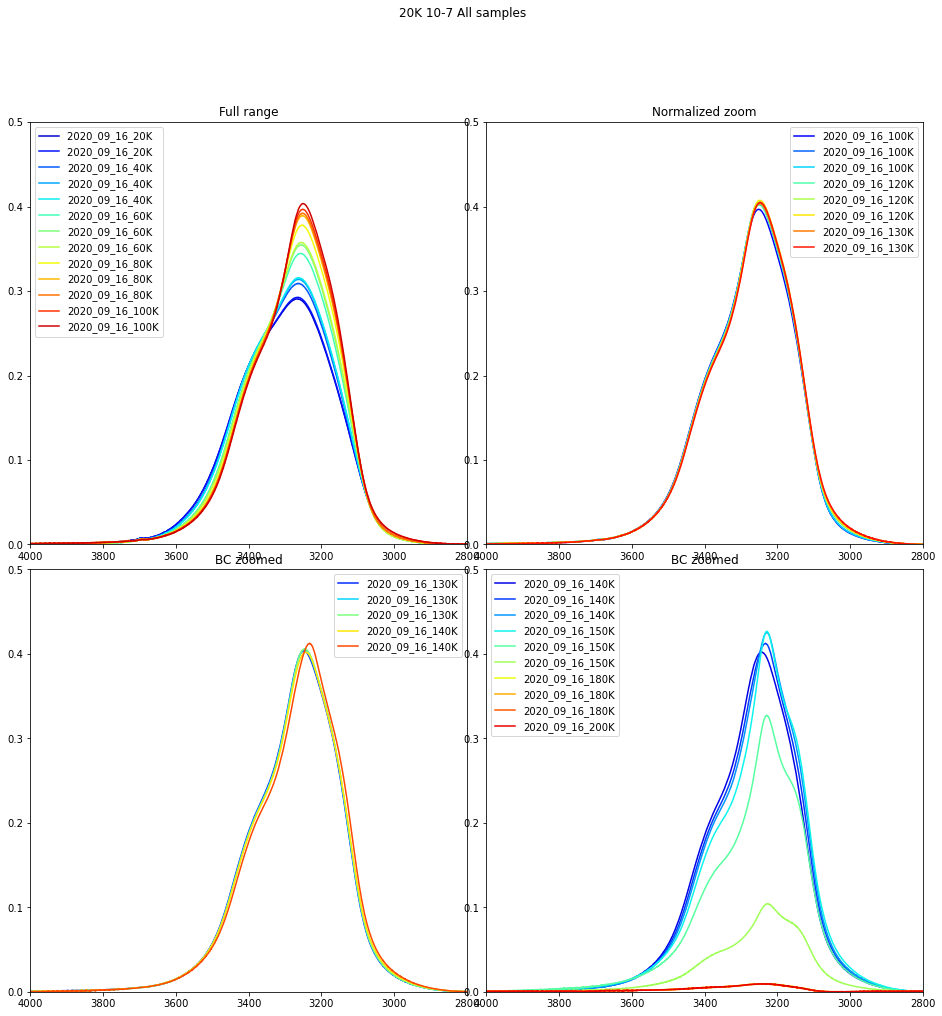

In [614]:
gs = gridspec.GridSpec(16, 16,hspace=0.8,wspace=0.5)

fig = plt.figure(figsize=(16,16))

fig.suptitle('20K 10-7 All samples')

ax1 = fig.add_subplot(gs[0:8, 0:8]) # row 0, col 0

nscan = len(list(R1_df['Date'].values.tolist()))


j = 1
for i, j in zip(dat1['Name'], range(1,nscan)):   
#    for iscan in range(1,nscan):
#DR2

    #x = DR2_Allscans_full.Wavenumber
    #y = DR2_Allscans_full['{}'.format(i)]

    x = DR3_Allscan_df.Wavenumber
    y = DR3_Allscan_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(R1_df.loc[i]['Date']), str(R1_df.loc[i]['Temp'])), c=cm.jet(j/nscan)) 
    
    j=+1
ax1.set_title('Full range')
ax1.axis([4000, 2800, 0, 0.5])

plt.legend()

ax2 = fig.add_subplot(gs[0:8, 8:16]) # row 0, col 0
nscan = len(list(R2_df['Date'].values.tolist()))


j = 1
for i, j in zip(dat2['Name'], range(1,nscan)):   
#    for iscan in range(1,nscan):
#DR2

    #x = DR2_Allscans_full.Wavenumber
    #y = DR2_Allscans_full['{}'.format(i)]

    x = DR3_Allscan_df.Wavenumber
    y = DR3_Allscan_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(R2_df.loc[i]['Date']), str(R2_df.loc[i]['Temp'])), c=cm.jet(j/nscan)) 
    
    j=+1
ax2.set_title('Normalized zoom')
ax2.margins(2, 2)     
ax2.axis([4000, 2800, 0, 0.5])

plt.legend()

ax3 = fig.add_subplot(gs[8:16, 0:8]) # row 0, col 0  

nscan = len(list(R3_df['Date'].values.tolist()))


j = 1
for i, j in zip(dat3['Name'], range(1,nscan)):   
#    for iscan in range(1,nscan):
#DR2

    #x = DR2_Allscans_full.Wavenumber
    #y = DR2_Allscans_full['{}'.format(i)]

    x = DR3_Allscan_df.Wavenumber
    y = DR3_Allscan_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(R3_df.loc[i]['Date']), str(R3_df.loc[i]['Temp'])), c=cm.jet(j/nscan)) 
    
    j=+1

ax3.set_title('BC zoomed')
ax3.axis([4000, 2800, 0, 0.5])

plt.legend()

ax4 = fig.add_subplot(gs[8:16, 8:16]) # row 0, col 0  

nscan = len(list(R4_df['Date'].values.tolist()))


j = 1
for i, j in zip(dat4['Name'], range(1,nscan)):   
#    for iscan in range(1,nscan):
#DR2

    #x = DR2_Allscans_full.Wavenumber
    #y = DR2_Allscans_full['{}'.format(i)]

    x = DR3_Allscan_df.Wavenumber
    y = DR3_Allscan_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(R4_df.loc[i]['Date']), str(R4_df.loc[i]['Temp'])), c=cm.jet(j/nscan)) 
    
    j=+1

ax4.set_title('BC zoomed')
ax4.axis([4000, 2800, 0, 0.5])

plt.legend()

plt.show()

insert condition to supress first scan (ramp)
Implement maxA 
Increase spacing between plots

## Other plot

### Different DR Outputs

# 1.6 Scan Averaging and error analysis ?

Supress the first scan and average the remaining scan 

Have a though about error bars

# 1.7 Data processing

## 1.7.1 Linear regression of desorption

This is where some fitting options needs to be implemented ie:

- linear regression for desorption data
- Polynomial for isotherms at 130, 135K ?


## 1.7.2 polynomial fitting of isotherm at 130K

Goal,

# <span style='background :yellow' > $\color{green}{\text{DP2 : Substraction scan}}$ </span>

use DR2 data

Purpose here is to obtain 4 different substraction spectra for each of the presestablished range (use hot-warm color to plot)

## 2.1 Data Sanity Check

In [618]:
DR2_Allscan_df

,Wavenumber,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,ASW_2020_09_16_6,ASW_2020_09_16_7,ASW_2020_09_16_8,ASW_2020_09_16_9,...,ASW_2020_09_16_22,ASW_2020_09_16_23,ASW_2020_09_16_24,ASW_2020_09_16_25,ASW_2020_09_16_26,ASW_2020_09_16_27,ASW_2020_09_16_28,ASW_2020_09_16_29,ASW_2020_09_16_30,ASW_2020_09_16_31
0,799.8442,0.061813,0.062677,0.070377,0.071031,0.073033,0.080603,0.082825,0.082317,0.076416,...,0.075763,0.076066,0.079565,0.066078,0.036983,1.208800e-02,0.010380,0.009372,0.019374,0.024476
1,800.3264,0.059208,0.059777,0.064277,0.064086,0.066281,0.071669,0.073525,0.073328,0.074872,...,0.078339,0.077832,0.072493,0.057070,0.026945,1.322894e-02,0.013822,0.014464,0.012764,0.014710
2,800.8085,0.056651,0.057048,0.058439,0.057722,0.059902,0.061544,0.062610,0.062986,0.071371,...,0.080060,0.079476,0.064838,0.047136,0.015713,1.315906e-02,0.016658,0.018453,0.005863,0.003743
3,801.2906,0.056841,0.057890,0.060087,0.059701,0.061729,0.062140,0.062420,0.063328,0.067884,...,0.078313,0.077758,0.065762,0.047844,0.016686,9.477973e-03,0.013506,0.014474,0.007172,0.005007
4,801.7727,0.057564,0.059094,0.061732,0.062012,0.063394,0.063903,0.064343,0.065137,0.066419,...,0.076559,0.076257,0.067310,0.049790,0.019333,7.106789e-03,0.010807,0.011125,0.008528,0.007343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,3998.2570,0.000884,0.000916,0.000533,0.000411,0.000489,0.000455,0.000351,0.000354,0.000671,...,0.000517,0.000439,0.000271,0.000298,0.000265,8.496525e-04,0.001301,0.001360,0.000570,0.000499
6637,3998.7390,0.000476,0.000507,0.000442,0.000392,0.000458,0.000406,0.000405,0.000389,0.000365,...,0.000545,0.000511,0.000201,0.000147,0.000083,5.061728e-04,0.001114,0.001210,0.000541,0.000224
6638,3999.2210,0.000000,0.000000,0.000000,0.000039,0.000088,0.000000,0.000165,0.000143,0.000000,...,0.000230,0.000293,0.000000,0.000000,0.000000,8.673617e-19,0.000496,0.000662,0.000367,0.000000
6639,3999.7030,0.000703,0.000696,0.000560,0.000518,0.000532,0.000404,0.000418,0.000411,0.000688,...,0.000306,0.000316,0.000361,0.000730,0.000735,7.928652e-04,0.000675,0.000729,0.000716,0.001262


In [624]:
wavelength = DR2_Allscan_df.T.iloc[0]

In [625]:
wavelength

0        799.8442
1        800.3264
2        800.8085
3        801.2906
4        801.7727
          ...    
6636    3998.2570
6637    3998.7390
6638    3999.2210
6639    3999.7030
6640    4000.1850
Name: Wavenumber, Length: 6641, dtype: float64

## 2.2  Function definition

In [631]:
def substraction(index1, date, index2):
    
#    exp_date1 = input('date of experiment 1 (format YYYY_MM_DD) = ')
#    index1 = int(input('index 1 = '))
#    exp_date2 = input('date of experiment 2 (format YYYY_MM_DD) = ')
#    index2 = int(input('index 2 = '))
    
    data1 = DR2_Allscan_df
    #data2 = pd.read_csv('D:\PhD-WS\Projects\PAC\{}}\DATA\{0}\Data\DR2_{}_All_data.csv'.format(XP,date))

    data1 = data1.T.iloc[1:].T
    #data2 = data2.T.iloc[1:].T
    
    
#Scan 1    
    
    list_name1 =  list(data1.columns.values.tolist())
    
    scan_place1 = 0
    
    for i in range(len(list_name1)):
                
        name_corr = list_name1[i].split('_')
        
        if int(name_corr[-1]) == int(index1):
    
            scan_place1 = i
    
    scan1 = data1.T.iloc[scan_place1]
    
#Scan 2    
    
    list_name2 =  list(data1.columns.values.tolist())
    
    scan_place2 = 0
    
    for i in range(len(list_name2)):
        
        name_corr = list_name2[i].split('_')
        
        if int(name_corr[-1]) == int(index2):
    
            scan_place2 = i
    
    scan2 = data1.T.iloc[scan_place2]
    
    sub_scan = numpy.zeros(len(scan1))
    
    for iscan in range(len(sub_scan)):
        
        sub_scan[iscan] = scan2[iscan] - scan1[iscan]
    
    return sub_scan

## 2.3 Plotting

### All Range

31


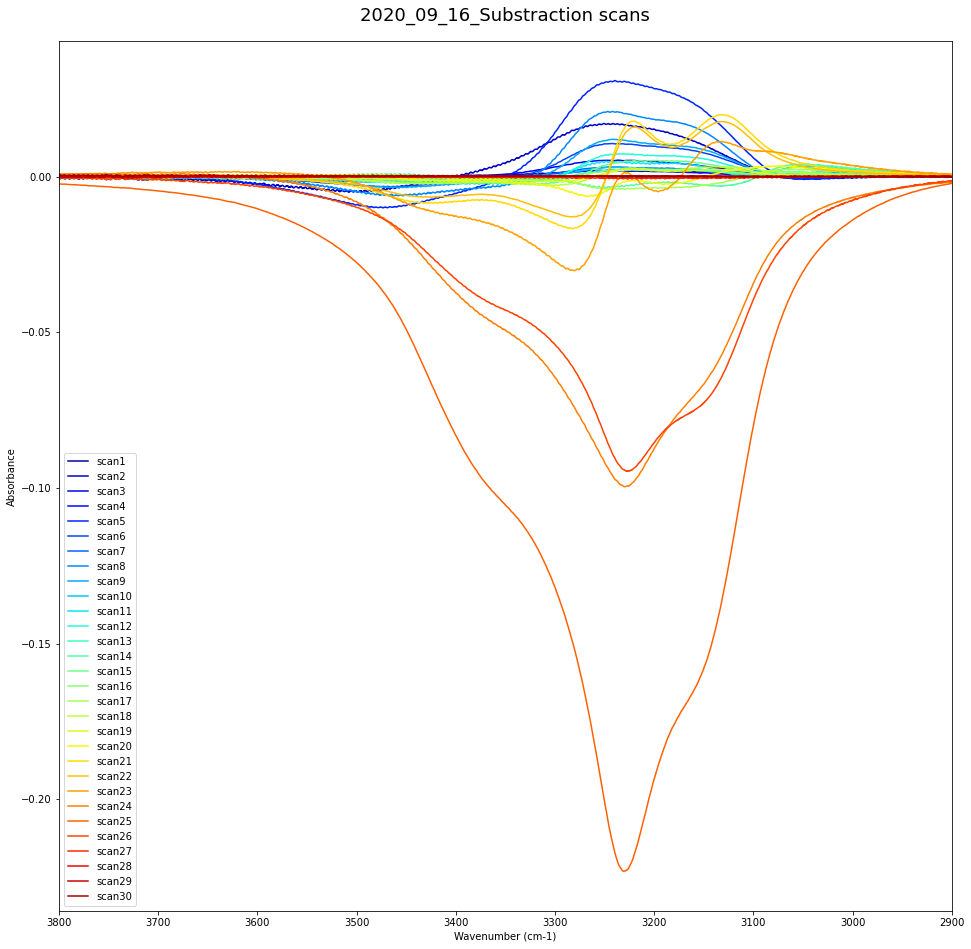

In [634]:
#date = "2020_09_15"

data1 = DR2_Allscan_df


data1 = data1.T.iloc[1:].T
    
#data = data.T.iloc[1:].T
#data = data1


nscan = len(list(data1.columns.values.tolist()))

print(nscan)
#print(data1)


fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot()


ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
#ax.set_zlabel('Absorbance')

data_sub = []
data_sub_2 =[]

for iscan in range(nscan-1):
    
    iscan = iscan+1
     
    sub_scan = substraction(iscan, date, iscan+1)
    
    df = pd.DataFrame({'Wavenumber': wavelength, "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1): sub_scan})
    
    #df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{}\Data\DP1\DP1_{}_sub-scan_{}.csv'.format(date,date, iscan))
    
    #data_int.append(df)
    
    
    data_sub.append(
        
        {
            

            'Name' : "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1),
            'Wavenumber' : wavelength,
            'sub_scan' : sub_scan,

        }) 
    
    data_sub_2.append(df)
    


    plt.plot(wavelength, sub_scan, c=cm.jet(iscan/nscan), label = "scan{0}".format(str(iscan)))
       

plt.title('{}_Substraction scans'.format(date), pad=20).set_fontsize(18)
ax.hlines(0,3900,2900)
plt.xlim([3800,2900])
plt.legend()
plt.show()

### Range 1

Insert condition to use only items present in range 1 

In [ ]:
#date = "2020_09_15"

data1 = DR2_Allscan_df


data1 = data1.T.iloc[1:].T
    
#data = data.T.iloc[1:].T
#data = data1


nscan = len(list(data1.columns.values.tolist()))

print(nscan)
#print(data1)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()


ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
#ax.set_zlabel('Absorbance')

data_sub = []
data_sub_2 =[]

for iscan in range(nscan-1):
    
    iscan = iscan+1
     
    sub_scan = substraction(iscan, date, iscan+1)
    
    df = pd.DataFrame({'Wavenumber': wavelength, "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1): sub_scan})
    
    #df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{}\Data\DP1\DP1_{}_sub-scan_{}.csv'.format(date,date, iscan))
    
    #data_int.append(df)
    
    
    data_sub.append(
        
        {
            

            'Name' : "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1),
            'Wavenumber' : wavelength,
            'sub_scan' : sub_scan,

        }) 
    
    data_sub_2.append(df)
    


    plt.plot(wavelength, sub_scan, c=cm.jet(iscan/nscan), label = "scan{0}".format(str(iscan)))
       

plt.title('{}_Substraction scans'.format(date), pad=20).set_fontsize(18)
ax.hlines(0,3900,2900)
plt.xlim([3800,2900])
plt.legend()
plt.show()

In [ ]:
df

In [ ]:
data_sub

In [ ]:
data_sub_2

Idea here would be to split and produce 4 different substraction plots for each transformation processes ie:
cf Report 1 for different ranges:

## Preliminary analysis 

Purpose here would be (for the different physical processes that the ice undergo upon annealing) to investigate the different contributions lost and gain from the substraction spectra

This will subsequently be used as initial guesses for the gaussian fit of the whole samples

An intermediate gaussian fitting routine could be implemented here with the substraction spectra

## Export Data Sub as csv

### Concatenation

In [ ]:
data_sub

In [ ]:
data_sub_2_df  = reduce(lambda left,right: pd.merge(left,right, on=['Wavenumber'],how='outer'), data_sub_2)

## Export as csv

# <span style='background :yellow' > $\color{green}{\text{DP3 : Gaussian Fitting}}$ </span>

[Lmfit web-site - Example](https://lmfit.github.io/lmfit-py/builtin_models.html#example-3-fitting-multiple-peaks-and-using-prefixes)

## What Data ?

### Substraction scan

Later

### OH Stretch

In [ ]:
DR2_A_df = DR2_df[4149:6639]

In [ ]:
DR2_A_df

## Gaussian fit 1

In [ ]:

x = DR2_A_df["Wavenumber"]
y = DR2_A_df["ASW_2020_09_16_1"]

pars = exp_mod.guess(y, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=3400, min=3300, max=3500)
pars['g1_sigma'].set(value=15, min=3)
pars['g1_amplitude'].set(value=10, min=1)

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=3260, min=3200, max=3300)
pars['g2_sigma'].set(value=15, min=3)
pars['g2_amplitude'].set(value=10, min=1)

mod = gauss1 + gauss2 

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, init, 'k--', label='initial fit')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].invert_xaxis()
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')
axes[1].plot(x, comps['g2_'], 'm--', label='Gaussian component 2')
axes[1].invert_xaxis()
axes[1].legend(loc='best')

plt.show()
# <end examples/doc_builtinmodels_nistgauss.py>